In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [ ]:
# some matplotlib params to make the defaults a bit more readable
mpl.rcParams['figure.figsize'] = [8.0, 6.0]
mpl.rcParams['font.size'] = 15
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

In [ ]:
train = pd.read_csv('./data/train.csv')
train.head()

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0


In [ ]:
train.describe()

,Block,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
count,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000
mean,35.687797,41.841139,-87.699908,7.819532,12.853512,0.052446
std,24.339468,0.112742,0.096514,1.452921,16.133816,0.222936
min,10.000000,41.644612,-87.930995,3.000000,1.000000,0.000000
25%,12.000000,41.732984,-87.760070,8.000000,2.000000,0.000000
50%,33.000000,41.846283,-87.694991,8.000000,5.000000,0.000000
75%,52.000000,41.954690,-87.627796,9.000000,17.000000,0.000000
max,98.000000,42.017430,-87.531635,9.000000,50.000000,1.000000


In [ ]:
for col in train:
    print(f'{col} column count of unique values: {len(train[col].unique())}')

Date column count of unique values: 95
Address column count of unique values: 138
Species column count of unique values: 7
Block column count of unique values: 64
Street column count of unique values: 128
Trap column count of unique values: 136
AddressNumberAndStreet column count of unique values: 138
Latitude column count of unique values: 138
Longitude column count of unique values: 138
AddressAccuracy column count of unique values: 4
NumMosquitos column count of unique values: 50
WnvPresent column count of unique values: 2


In [ ]:
# checking for null values
train.isnull().sum()

Date                      0
Address                   0
Species                   0
Block                     0
Street                    0
Trap                      0
AddressNumberAndStreet    0
Latitude                  0
Longitude                 0
AddressAccuracy           0
NumMosquitos              0
WnvPresent                0
dtype: int64

<AxesSubplot:xlabel='Date', ylabel='NumMosquitos'>

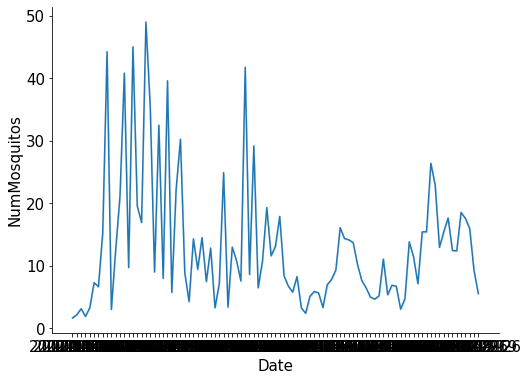

In [ ]:
# trying to create a line plot based on the dates, time-series??
# there are too many dates...

sns.lineplot(x = "Date", y = "NumMosquitos", data = train, ci=False)
# ci refers to confidence interval, remove by ci=False
# noted that ['Date'] is in string format, so this should be wrong

In [ ]:
train['Date'].unique()

array(['2007-05-29', '2007-06-05', '2007-06-26', '2007-06-29',
       '2007-07-02', '2007-07-11', '2007-07-18', '2007-07-19',
       '2007-07-25', '2007-07-27', '2007-08-01', '2007-08-02',
       '2007-08-03', '2007-08-07', '2007-08-08', '2007-08-09',
       '2007-08-15', '2007-08-16', '2007-08-17', '2007-08-21',
       '2007-08-22', '2007-08-24', '2007-08-28', '2007-09-04',
       '2007-09-05', '2007-09-06', '2007-09-12', '2007-09-18',
       '2007-09-19', '2007-09-24', '2007-09-25', '2007-10-04',
       '2007-10-09', '2009-05-28', '2009-06-02', '2009-06-03',
       '2009-06-05', '2009-06-12', '2009-06-15', '2009-06-19',
       '2009-06-22', '2009-06-26', '2009-06-29', '2009-07-06',
       '2009-07-10', '2009-07-13', '2009-07-17', '2009-07-24',
       '2009-07-27', '2009-07-31', '2009-08-07', '2009-08-13',
       '2009-08-25', '2009-08-27', '2009-09-03', '2009-09-14',
       '2009-09-17', '2009-09-25', '2009-10-01', '2011-06-10',
       '2011-06-17', '2011-06-24', '2011-06-30', '2011-

In [ ]:
from datetime import datetime

train['datetime format'] = [pd.to_datetime(date) for date in train['Date']]

<AxesSubplot:xlabel='datetime format', ylabel='NumMosquitos'>

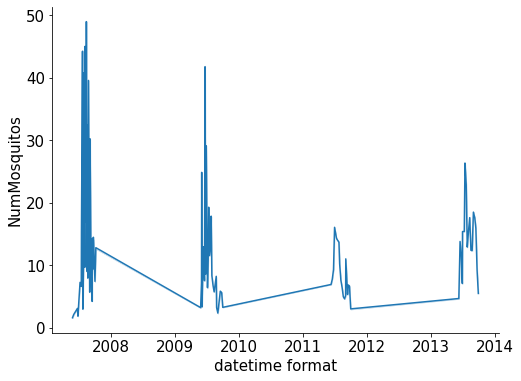

In [ ]:
sns.lineplot(x = "datetime format", y = "NumMosquitos", data = train, ci=False)
# noticed that the spikes are because the 

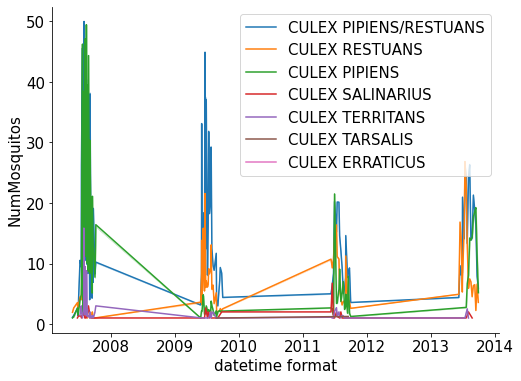

In [ ]:
# lineplot by 'Species'
sns.lineplot(x = "datetime format", y = "NumMosquitos", data = train, ci=False, hue='Species')
plt.legend()

In [ ]:
# try extracting the month-year format from datetime columns

train['mth-year']= train['datetime format'].dt.strftime('%m-%Y')

In [ ]:
train['mth-year'].unique()

array(['05-2007', '06-2007', '07-2007', '08-2007', '09-2007', '10-2007',
       '05-2009', '06-2009', '07-2009', '08-2009', '09-2009', '10-2009',
       '06-2011', '07-2011', '08-2011', '09-2011', '06-2013', '07-2013',
       '08-2013', '09-2013'], dtype=object)

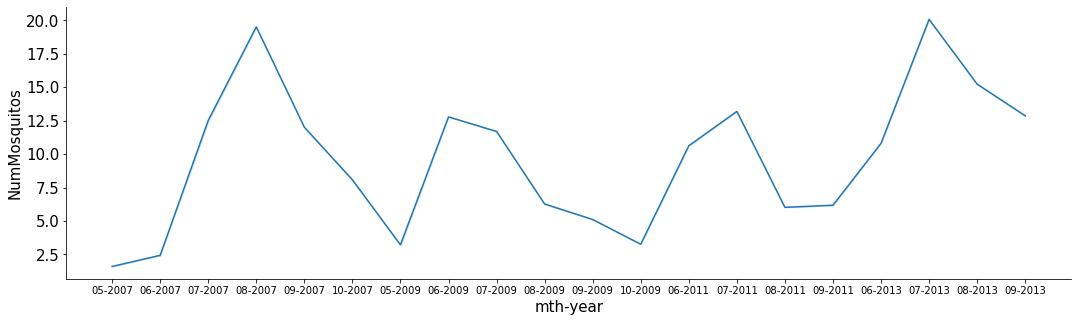

In [ ]:
plt.figure(figsize=(18,5))
sns.lineplot(x = "mth-year", y = "NumMosquitos", data = train, ci=False)
plt.xticks(fontsize=10);
#need to reduce the tick size... no space lol

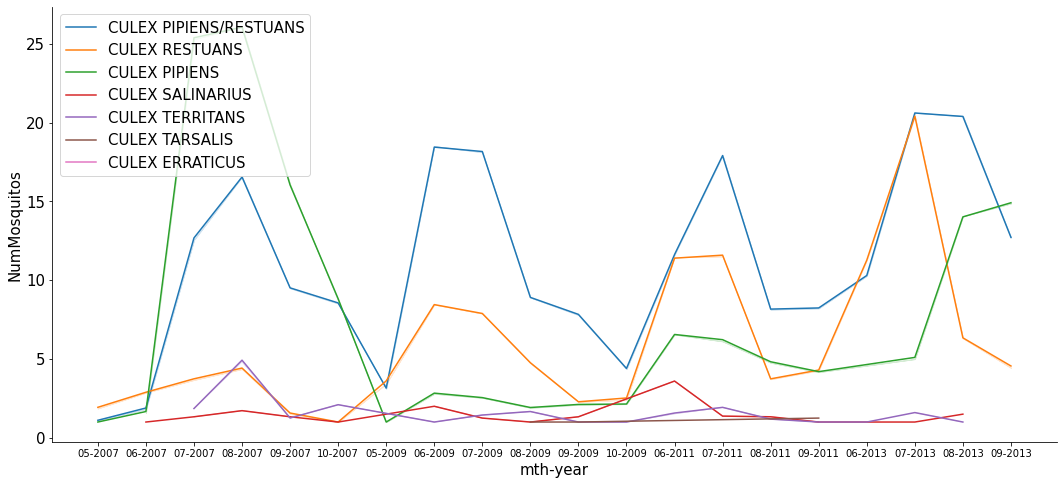

In [ ]:
plt.figure(figsize=(18,8))
sns.lineplot(x = "mth-year", y = "NumMosquitos", data = train, ci=False, hue='Species')
plt.legend()
plt.xticks(fontsize=10);
# can start to observe that the number of mosquitoes are different for different location

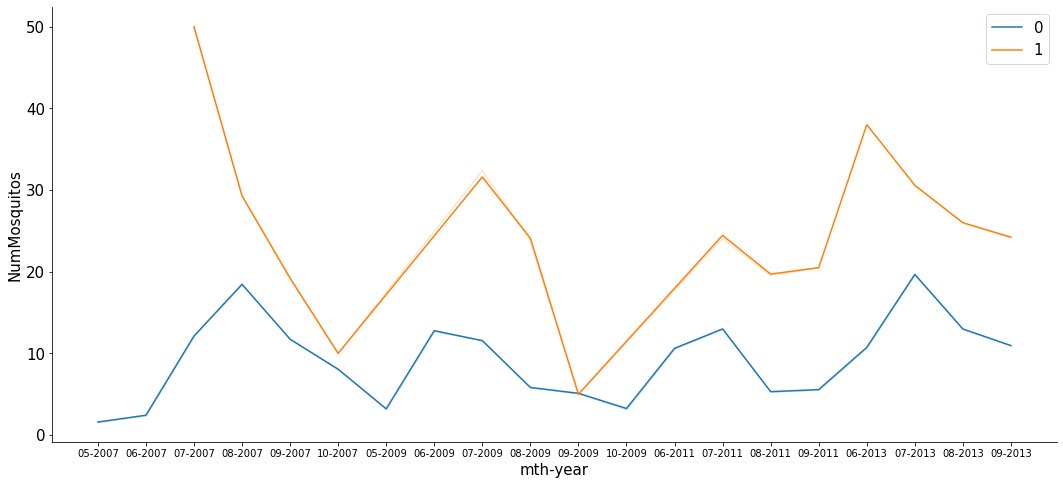

In [ ]:
# hue = 'WnvPresent'

plt.figure(figsize=(18,8))
sns.lineplot(x = "mth-year", y = "NumMosquitos", data = train, ci=False, hue='WnvPresent')
plt.legend()
plt.xticks(fontsize=10);
# can start to observe that the number of mosquitoes are different for different location

In [ ]:
train.columns

Index(['Date', 'Address', 'Species', 'Block', 'Street', 'Trap',
       'AddressNumberAndStreet', 'Latitude', 'Longitude', 'AddressAccuracy',
       'NumMosquitos', 'WnvPresent', 'datetime format', 'mth-year'],
      dtype='object')

<AxesSubplot:xlabel='Latitude', ylabel='Longitude'>

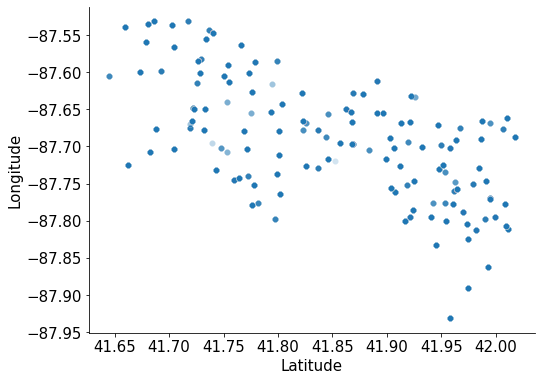

In [ ]:
# decided to plot the scatter plot latitude, y=longitude

sns.scatterplot(data=train, x="Latitude", y="Longitude", alpha=0.1)

In [ ]:
# decided to plot the scatter plot latitude, y=longitude

sns.scatterplot(data=train, x="Latitude", y="Longitude", alpha=0.1, )

<AxesSubplot:xlabel='Latitude', ylabel='Longitude'>

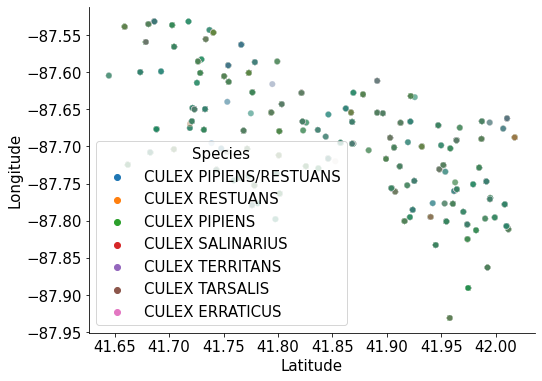

In [ ]:
# differentiated by 'Species'
# played with 'alpha' to look at the different species, green species 'breed' more
# can remove alpha to look at other mosquitoes
sns.scatterplot(data=train, x="Latitude", y="Longitude", hue='Species', alpha=0.1)

<AxesSubplot:xlabel='Latitude', ylabel='Longitude'>

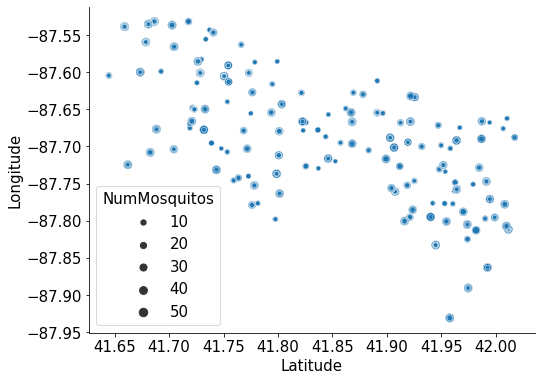

In [ ]:
# exploring the size keyword, bigger size means more mosquitoes at the Latitude,Longitude
sns.scatterplot(data=train, x="Latitude", y="Longitude", size='NumMosquitos')

<AxesSubplot:xlabel='Latitude', ylabel='Longitude'>

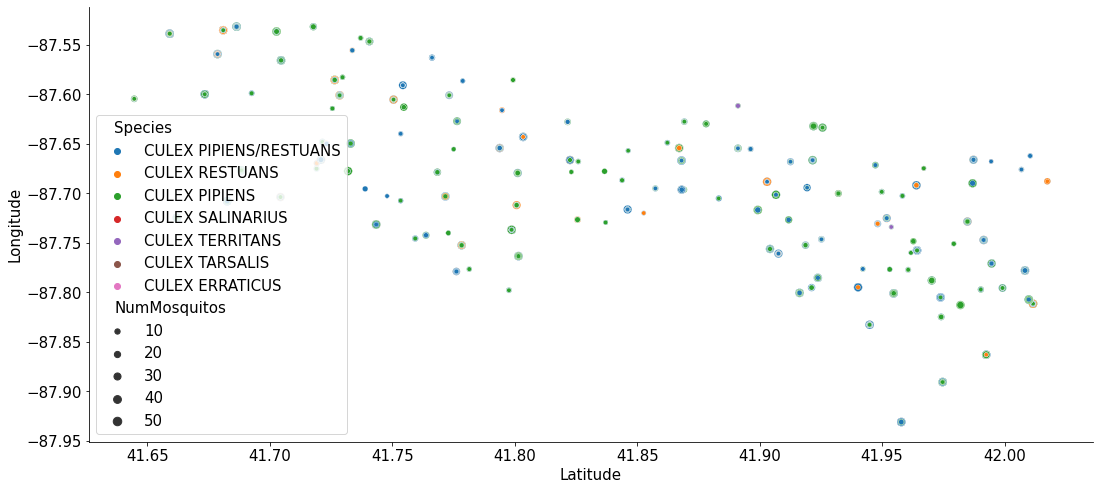

In [ ]:
# this plot rather confusing and hard to intepret as different species can be in the same latitude/longitude
plt.figure(figsize=(18,8))
sns.scatterplot(data=train, x="Latitude", y="Longitude", size='NumMosquitos', hue='Species')